## What are the differences between supervised and unsupervised learning?

#### Supervised machine learning (labelled input and output training data). 

Supervised learning can be separated into two types of problems when data mining: classification and regression:

- **Classification** problems use an algorithm to accurately assign test data into specific categories, such as separating apples from oranges. Or, in the real world, supervised learning algorithms can be used to classify spam in a separate folder from your inbox. Linear classifiers, support vector machines, decision trees and random forest are all common types of classification algorithms.
- **Regression** is another type of supervised learning method that uses an algorithm to understand the relationship between dependent and independent variables. Regression models are helpful for predicting numerical values based on different data points, such as sales revenue projections for a given business. Some popular regression algorithms are linear regression, logistic regression and polynomial regression.
What is unsupervised learning?




#### Unsupervised learning (process unlabelled or raw data)

Unsupervised learning uses machine learning algorithms to analyze and cluster unlabeled data sets. These algorithms discover hidden patterns in data without the need for human intervention (hence, they are “unsupervised”).

Unsupervised learning models are used for three main tasks: clustering, association and dimensionality reduction:

- **Clustering** is a data mining technique for grouping unlabeled data based on their similarities or differences. For example, K-means clustering algorithms assign similar data points into groups, where the K value represents the size of the grouping and granularity. This technique is helpful for market segmentation, image compression, etc.
- **Association** is another type of unsupervised learning method that uses different rules to find relationships between variables in a given dataset. These methods are frequently used for market basket analysis and recommendation engines, along the lines of “Customers Who Bought This Item Also Bought” recommendations.
- **Dimensionality reduction** is a learning technique used when the number of features  (or dimensions) in a given dataset is too high. It reduces the number of data inputs to a manageable size while also preserving the data integrity. Often, this technique is used in the preprocessing data stage, such as when autoencoders remove noise from visual data to improve picture quality.

#### More...

**Goals:** In supervised learning, the goal is to predict outcomes for new data. You know up front the type of results to expect. With an unsupervised learning algorithm, the goal is to get insights from large volumes of new data. The machine learning itself determines what is different or interesting from the dataset.
Applications: Supervised learning models are ideal for spam detection, sentiment analysis, weather forecasting and pricing predictions, among other things. In contrast, unsupervised learning is a great fit for anomaly detection, recommendation engines, customer personas and medical imaging.

**Complexity:** Supervised learning is a simple method for machine learning, typically calculated through the use of programs like R or Python. In unsupervised learning, you need powerful tools for working with large amounts of unclassified data. Unsupervised learning models are computationally complex because they need a large training set to produce intended outcomes.

**Drawbacks:** Supervised learning models can be time-consuming to train, and the labels for input and output variables require expertise. Meanwhile, unsupervised learning methods can have wildly inaccurate results unless you have human intervention to validate the output variables.

## What are the popular libraries used in Data Science?
The popular libraries used in Data Science are 

- Tensor Flow for machine learning and artificial intelligence. 
- Pandas  for data manipulation and analysis
- NumPy
- SciPy
- Scrapy
- Librosa
- MatPlotLib

## How is logistic regression done?

Logistic Regression is a superviosioned algorithm to solve classification problems. it measures the relationship between the dependent variable (our label of what we want to predict) and one or more independent variables (our features) *by estimating probability* using its underlying logistic function (sigmoid).

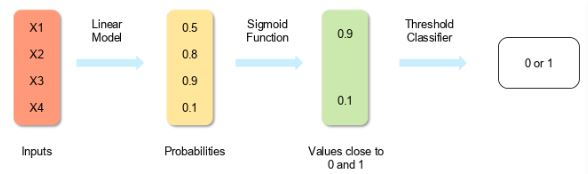


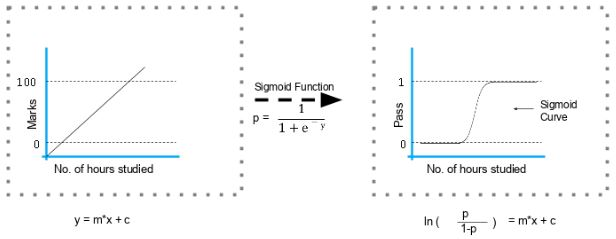

#### using sklearn... 

In [6]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1) # size 
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # has or has not cancer

# train the model 
logr = linear_model.LogisticRegression()
logr.fit(X,y)

# predict a future case using the model 
# ex. if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


#### why *.reshape(-1,1)*  ?

In [5]:
numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1) 
# -1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis.

# E.g, If you have an array of shape (2,4) then reshaping it with (-1, 1), then the array will get reshaped in such 
# a way that the resulting array has only 1 column and this is only possible by having 8 rows, hence, (8,1).

array([[3.78],
       [2.44],
       [2.09],
       [0.14],
       [1.72],
       [1.65],
       [4.92],
       [4.37],
       [4.96],
       [4.52],
       [3.69],
       [5.88]])

## Differentiate between univariate, bivariate, and multivariate analysis.


### Univariate analysis
here are three common ways to perform univariate analysis on one variable:

1. Summary statistics – Measures the center and spread of values. Mean, median, mode, standard deviation 

2. Frequency table – Describes how often different values occur.

3. Charts – Used to visualize the distribution of values. box-plot, violin-plot, histogram, density curve


In [9]:
# to show output for all lines in the cell not only the last one :
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# for example check the output of the following cell

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as gobj
py.init_notebook_mode(connected=True)

In [16]:
data = pd.read_csv('data/adult.csv')


def plot_value_counts(data, col_name, table=False, bar=False):
    
    values_count = pd.DataFrame(data[col_name].value_counts())
    values_count.columns = ['count']
    
    # convert the index column into a regular column.
    values_count[col_name] = [ str(i) for i in values_count.index ]
    
    # add a column with the percentage of each data point to the sum of all data points.
    values_count['percent'] = values_count['count'].div(values_count['count'].sum()).multiply(100).round(2)
    
    # change the order of the columns. df.reindex
    values_count = values_count.reindex([col_name,'count','percent'],axis=1)
    values_count.reset_index(drop=True,inplace=True)
    
    if bar :
        # add a font size for annotations0 which is relevant to the length of the data points.
        font_size = 20 - (.25 * len(values_count[col_name]))
        
        trace0 = gobj.Bar( x = values_count[col_name], y = values_count['count'] )
        data_ = gobj.Data( [trace0] )
        
        annotations0 = [ dict(x = xi,
                             y = yi, 
                             showarrow=False,
                             font={'size':font_size},
                             text = "{:,}".format(yi),
                             xanchor='center',
                             yanchor='bottom' )
                       for xi,yi,_ in values_count.values ]
        
        annotations1 = [ dict( x = xi,
                              y = yi/2,
                              showarrow = False,
                              text = "{}%".format(pi),
                              xanchor = 'center',
                              yanchor = 'center',
                              font = {'color':'yellow'})
                         for xi,yi,pi in values_count.values if pi > 10 ]
        
        annotations = annotations0 + annotations1                       
        
        layout = gobj.Layout( title = col_name.replace('_',' ').capitalize(),
                             titlefont = {'size': 30},
                             yaxis = {'title':'count'},
                             xaxis = {'type':'category'},
                            annotations = annotations  )
        figure = gobj.Figure( data = data_, layout = layout )
        py.iplot(figure)
    
    if table : 
        values_count['count'] = values_count['count'].apply(lambda d : "{:,}".format(d))
        table = ff.create_table(values_count,index_title="race")
        py.iplot(table)
    
    return values_count

In [17]:
plot_value_counts(data, "age",0,1) 

C:\Users\LuconiZ\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




,age,count,percent
0,36,898,2.76
1,31,888,2.73
2,34,886,2.72
3,23,877,2.69
4,35,876,2.69
...,...,...,...
68,83,6,0.02
69,88,3,0.01
70,85,3,0.01
71,86,1,0.00


In [39]:
def plot_histogram(data, col_name):
    series = data[col_name]
    # remove zero values items [ indicates NA values.]
    series = series[ series != 0 ]
    smin,smax = series.min(),series.max()
    # remove outliers for +- three standard deviations.
    series = series[ ~( ( series - series.mean() ).abs() > 3 * series.std() ) ]
    percentiles = [ np.percentile(series,n) for n in (2.5,50,97.5) ]
    
    trace0 = gobj.Histogram( x = series,
                            histfunc = 'avg', 
                            histnorm = 'probability density',
                            opacity=.75,
                           marker = {'color':'#EB89B5'})
    data_ = gobj.Data( [trace0] )
    
    shapes = [{ 'line': { 'color': '#0099FF', 'dash':'solid', 'width':2 },
                'type':'line',
                'x0':percentiles[0], 'x1':percentiles[0], 'xref':'x',
                'y0':-0.1, 'y1':1, 'yref':'paper' },
               
              { 'line': { 'color': '#00999F', 'dash':'solid', 'width':1 },
                'type':'line',
                'x0':percentiles[1], 'x1':percentiles[1], 'xref':'x',
                'y0':-0.1, 'y1':1, 'yref':'paper' },
    
              { 'line': { 'color': '#0099FF', 'dash':'solid', 'width':2 },
                'type':'line',
                'x0':percentiles[2], 'x1':percentiles[2], 'xref':'x',
                'y0':-0.1, 'y1':1, 'yref':'paper' } 
             ]
    
    annotations = [ {'x': percentiles[0], 'xref':'x','xanchor':'right',
                     'y': .3, 'yref':'paper', 
                     'text':'2.5%', 'font':{'size':16},
                     'showarrow':False},
                   
                    {'x': percentiles[1], 'xref':'x','xanchor':'center',
                     'y': .2, 'yref':'paper', 
                     'text':'95%<br>median = {0:,.2f}<br>mean = {1:,.2f}<br>min = {2:,}<br>max = {3:,}'
                         .format(percentiles[1],series.mean(),smin,smax), 
                     'showarrow':False,
                     'font':{'size':20} },
                   
                    {'x': percentiles[2], 'xref':'x','xanchor':'left',
                     'y': .3, 'yref':'paper', 
                     'text':'2.5%','font':{'size':16}, 
                     'showarrow':False},
                   
                    {'x': .5, 'xref':'paper','xanchor':'center',
                     'y': 1.1, 'yref':'paper','yanchor':'top', 
                     'text':'**Outliers above or below three standard deviations are excluded from the graph, mean and median calculations.',
                     'font':{'size':15,'color':'red'}, 
                     'showarrow':False} 
                  ]
    
    layout = gobj.Layout( title = col_name.replace('_',' ').capitalize(),
                        titlefont = {'size':20},
                        yaxis = {'title':'Probability/Density'},
                        xaxis = {'title':col_name, 'type':'-'},
                        shapes = shapes,
                         annotations = annotations
                         )
    figure = gobj.Figure(data = data_, layout = layout)
    py.iplot(figure)


In [38]:
plot_histogram(data, "age")

##
## Bias and Variance


## Regression model 

## Explain the steps in making a decision tree.
 
A decision tree is a supervised learning algorithm that is used for classification and regression modeling. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Classification: https://www.youtube.com/watch?v=_L39rN6gz7Y

Regression: https://www.youtube.com/watch?v=g9c66TUylZ4&t=0s

- Take the entire data set as input
- Calculate entropy of the target variable, as well as the predictor attributes
- Calculate your information gain of all attributes (we gain information on sorting different objects from each other)
- Choose the attribute with the highest information gain as the root node 
- Repeat the same procedure on every branch until the decision node of each branch is finalized



Advantages of Using Decision Trees
- Decision trees are simple to understand, interpret, and visualize
- They can effectively handle both numerical and categorical data
- They can determine the worst, best, and expected values for several scenarios
- Decision trees require little data preparation and data normalization
- They perform well, even if the actual model violates the assumptions

In [7]:
from sklearn.datasets import load_iris # import the dataset
from sklearn import tree
iris = load_iris()

# define independent and dependent variable 
X, y = iris.data, iris.target


clf = tree.DecisionTreeClassifier()

# train the model 
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

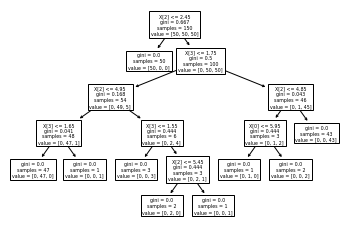

In [8]:
tree.plot_tree(clf)